 # Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_df = pd.read_csv('winequalitydataset.csv')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.384,0.698,-0.000,1.925,0.076,11.007,33.115,0.998,3.510,0.561,9.420,5
1,7.806,0.879,-0.000,2.620,0.098,25.021,66.937,0.997,3.199,0.679,9.797,5
2,7.799,0.763,0.040,2.284,0.092,14.957,53.772,0.997,3.261,0.650,9.789,5
3,11.192,0.281,0.562,1.912,0.075,17.031,59.867,0.998,3.162,0.579,9.819,6
4,7.415,0.698,-0.001,1.907,0.076,10.962,34.210,0.998,3.508,0.559,9.391,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7.699,0.260,0.264,1.997,0.052,18.836,77.453,0.995,3.150,0.792,10.922,6
5996,7.900,0.579,0.230,2.309,0.075,22.908,94.240,0.997,3.210,0.581,9.498,6
5997,7.689,0.572,0.214,1.499,0.069,4.029,8.999,0.995,3.159,0.539,9.802,6
5998,7.908,0.345,0.359,1.918,0.066,4.811,9.835,0.994,3.269,0.540,11.220,7


In [4]:
wine_df.isnull().sum()
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6000 non-null   float64
 1   volatile acidity      6000 non-null   float64
 2   citric acid           6000 non-null   float64
 3   residual sugar        6000 non-null   float64
 4   chlorides             6000 non-null   float64
 5   free sulfur dioxide   6000 non-null   float64
 6   total sulfur dioxide  6000 non-null   float64
 7   density               6000 non-null   float64
 8   pH                    6000 non-null   float64
 9   sulphates             6000 non-null   float64
 10  alcohol               6000 non-null   float64
 11  quality               6000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 562.6 KB
None


# Data Analysis and Visulaization

In [5]:
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6000.000000       6000.000000  6000.000000     6000.000000   
mean        8.380630          0.526039     0.275434        2.543268   
std         1.752676          0.179046     0.195311        1.381243   
min         4.580000          0.118000    -0.005000        0.883000   
25%         7.173000          0.391000     0.099000        1.900000   
50%         7.987500          0.518000     0.260000        2.199000   
75%         9.302250          0.635000     0.431000        2.600250   
max        15.914000          1.583000     1.004000       15.498000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6000.000000          6000.000000           6000.000000  6000.000000   
mean      0.087803            15.744282             46.537166     0.996813   
std       0.047307            10.412584             33.113231     0.001891   
min       0.012000             0.870000         

# number of values for each quality


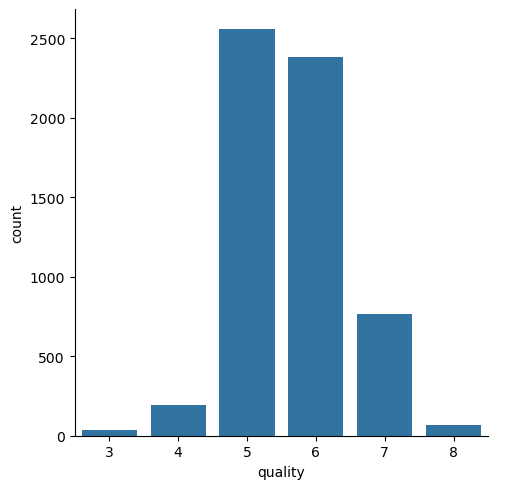

In [6]:
sns.catplot(x='quality',data=wine_df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

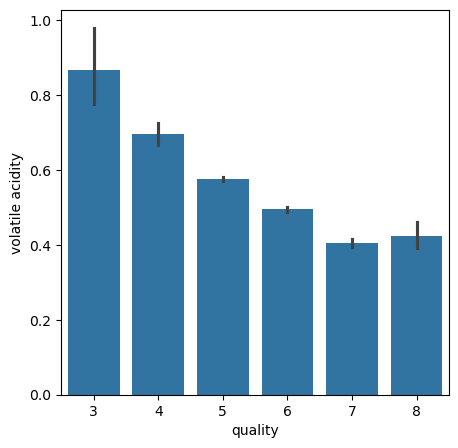

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

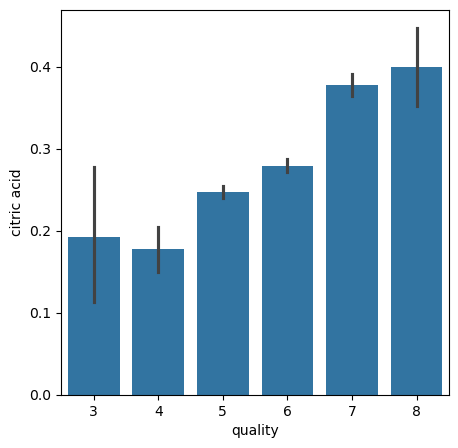

In [8]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

In [9]:
correlation = wine_df.corr()

<Axes: >

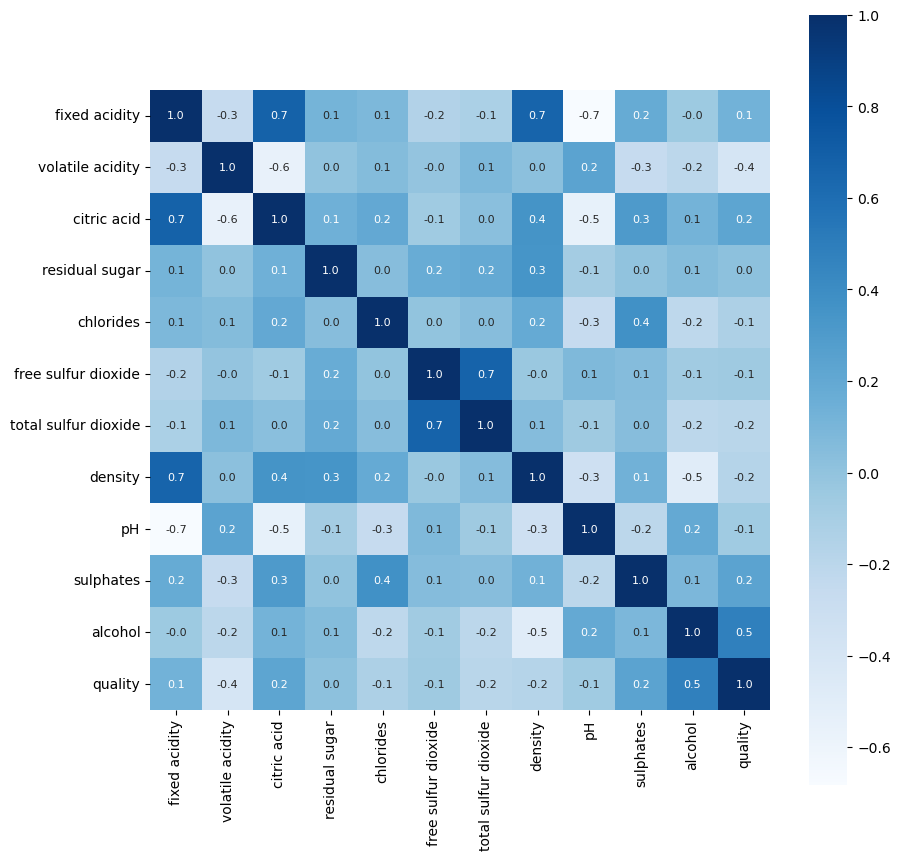

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

# separate the data and Label

In [11]:
X = wine_df.drop('quality',axis=1)

In [12]:
y = wine_df['quality']

In [13]:
y.value_counts()

quality
5    2556
6    2379
7     768
4     194
8      68
3      35
Name: count, dtype: int64

# Train & Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(y.shape, Y_train.shape, Y_test.shape)

(6000,) (4800,) (1200,)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)*100
print(f"Final Accuracy: {accuracy:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 248}
Final Accuracy: 96.42


# Model Training:

# Random Forest Classifier

In [29]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

In [31]:
# accuracy on test data

X_test_prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, X_test_prediction)  # Ensure correct order of arguments
print(f"Accuracy: {accuracy * 100:.2f}%")  

Accuracy: 98.92%


# Building a Predictive System

In [57]:
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
input_data = (7.829, 0.641, 0.096, 5.996, 0.115, 4.913, 10.787, 0.998, 3.370, 0.692, 10.098)
np_input_data = np.asarray(input_data).reshape(1, -1)
predict = model.predict(np_input_data)
print(f"Predicted Quality: {predict[0]}")

Predicted Quality: 7


In [56]:
wine_df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5442,7.829,0.641,0.096,5.996,0.115,4.913,10.787,0.998,3.370,0.692,10.098,7
4939,5.178,0.341,0.002,1.821,0.050,26.828,62.635,0.992,3.681,0.788,13.976,6
4877,6.190,0.449,0.199,1.580,0.068,2.811,15.050,0.996,3.410,0.560,9.181,5
1889,8.712,0.522,0.089,2.502,0.091,19.959,48.784,0.998,3.343,0.858,10.598,7
2009,8.966,0.428,0.340,2.484,0.080,26.044,85.948,0.999,3.378,0.619,9.512,6
174,7.267,0.382,0.209,2.014,0.080,7.041,35.048,0.996,3.331,0.471,9.494,5
1289,7.024,0.600,0.301,4.488,0.069,20.038,109.714,0.999,3.301,1.167,10.196,5
579,10.590,0.309,0.491,2.205,0.062,17.887,39.682,0.998,3.140,0.510,9.803,6
173,7.396,0.620,0.054,1.900,0.068,24.180,41.810,0.996,3.420,0.571,11.495,6
1218,8.199,0.401,0.307,1.906,0.082,7.900,23.809,0.996,3.241,0.687,10.608,6


In [58]:
import pickle

In [60]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)